In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt


from sklearn.metrics import silhouette_score

import tkinter as tk
from tkinter import messagebox

import sys
import time

import warnings
warnings.filterwarnings('ignore')



In [3]:
df = pd.read_csv("loan_dataset_10k.csv")

In [4]:
df.shape

(10191, 15)

In [5]:
mask = df['Applicant_Annual_Income'] < 0
s1 = mask.sum()
if mask.any():
    print("Column 'Applicant_Annual_Income' contains negative values:")
    print(df[mask])
else:
    print("Column 'Applicant_Annual_Income' does not contain negative values")
print(f"Total number of negative values {s1}")

Column 'Applicant_Annual_Income' contains negative values:
      Loan_ID Gender  Age Married  No_Of_Dependents Edu_Qualification   
83      81404      F   39     Yes               3.0      Not Graduate  \
402     81534      M   43      No               3.0      Not Graduate   
1031    78489      F   38      No               1.0      Not Graduate   
1685    90392      F   54     Yes               NaN      Not Graduate   
2346    82898      F   47      No               1.0      Not Graduate   
2610    91156      F   15      No               1.0      Not Graduate   
2668    16771      M   44     Yes               1.0      Not Graduate   
3288    56473      M   20     Yes               3.0      Not Graduate   
4320    16807      F   39      No               1.0      Not Graduate   
4586    72444      M   77     Yes               1.0      Not Graduate   
5126    44717      F   37     Yes               3.0      Not Graduate   
5753    90329      M   50     Yes               0.0      Not Grad

In [6]:
mask = df['Age'] < 0
s1 = mask.sum()
if mask.any():
    print("Column 'Age' contains negative values:")
    print(df[mask])
else:
    print("Column 'Age' does not contain negative values")
print(f"Total number of negative values {s1}")

Column 'Age' contains negative values:
       Loan_ID Gender  Age Married  No_Of_Dependents Edu_Qualification   
730      31025      F   -7      No               NaN      Not Graduate  \
838      64807      M   -1     Yes               NaN          Graduate   
1156     34092      F  -10     Yes               2.0      Not Graduate   
1179     26873      M   -5     Yes               1.0          Graduate   
1454     20540      F   -4     Yes               1.0          Graduate   
1557     59411      M  -11      No               NaN          Graduate   
1774     40456      F  -12      No               3.0          Graduate   
2194     52792      M   -1     Yes               3.0          Graduate   
2862     33856      F   -4     Yes               NaN      Not Graduate   
3186     69295      M   -1      No               1.0      Not Graduate   
3406     73135      M   -2     Yes               1.0      Not Graduate   
3710     83441      F   -1      No               NaN          Graduate   

In [7]:
mean_val = df['Age'].mean()
mask = df['Age'] < 0
df.loc[mask, 'Age'] = mean_val

In [8]:
mask = df['Age'] < 0
s1 = mask.sum()
if mask.any():
    print("Column 'Age' contains negative values:")
    print(df[mask])
else:
    print("Column 'Age' does not contain negative values")
print(f"Total number of negative values {s1}")

Column 'Age' does not contain negative values
Total number of negative values 0


In [9]:
df.shape

(10191, 15)

In [10]:
ean_val = df['Applicant_Annual_Income'].mean()
mask = df['Applicant_Annual_Income'] < 0
df.loc[mask, 'Applicant_Annual_Income'] = mean_val

In [11]:
mask = df['Applicant_Annual_Income'] < 0
s1 = mask.sum()
if mask.any():
    print("Column 'Applicant_Annual_Income' contains negative values:")
    print(df[mask])
else:
    print("Column 'Applicant_Annual_Income' does not contain negative values")
print(f"Total number of negative values {s1}")

Column 'Applicant_Annual_Income' does not contain negative values
Total number of negative values 0


In [12]:
df.isnull().sum()

Loan_ID                          0
Gender                           0
Age                              0
Married                          0
No_Of_Dependents              2002
Edu_Qualification                0
Employment_Status              850
Applicant_Annual_Income          0
Co_Applicant_Annual_Income       0
Applicant_Credit_History         0
Credit_Rating                    0
Existing_No_of_Loans             0
Loan Approved                    0
Loan_Amount_Availed              0
Car Purchased                  752
dtype: int64

In [13]:
df.dropna(subset=['No_Of_Dependents', 'Employment_Status','Car Purchased'], inplace=True)

In [14]:
df.isnull().sum()

Loan_ID                       0
Gender                        0
Age                           0
Married                       0
No_Of_Dependents              0
Edu_Qualification             0
Employment_Status             0
Applicant_Annual_Income       0
Co_Applicant_Annual_Income    0
Applicant_Credit_History      0
Credit_Rating                 0
Existing_No_of_Loans          0
Loan Approved                 0
Loan_Amount_Availed           0
Car Purchased                 0
dtype: int64

In [15]:
df.shape

(6978, 15)

In [16]:
df = df[df['Car Purchased'] != "No Vehicle"]
df['Age'] = df['Age'].astype(int)
df.head()

,Loan_ID,Gender,Age,Married,No_Of_Dependents,Edu_Qualification,Employment_Status,Applicant_Annual_Income,Co_Applicant_Annual_Income,Applicant_Credit_History,Credit_Rating,Existing_No_of_Loans,Loan Approved,Loan_Amount_Availed,Car Purchased
1,66660,F,44,No,1.0,Not Graduate,Agriculturist,2458481.0,0,812,Excellent,1,Y,368772.21,Maruti Suzuki Desire
2,44493,M,44,Yes,1.0,Not Graduate,Not-Employed,602018.0,222551,711,Good,1,Y,60201.87,Hyundai i10
3,20408,F,67,Yes,1.0,Not Graduate,Not-Employed,572456.0,190633,571,Average,1,Y,5724.56,Hyundai i10
5,60791,M,39,Yes,2.0,Graduate,Not-Employed,432647.0,197570,558,Average,1,Y,43264.74,Maruti Suzuki Swift
7,90286,M,54,No,1.0,Graduate,Priv Sector,2040569.0,211030,679,Good,0,Y,204056.94,Toyota Etios


In [17]:
df["Employment_Status"].unique()

array(['Agriculturist', 'Not-Employed', 'Priv Sector', 'Govt Sector',
       'Software Engineer', 'Self-Employed'], dtype=object)

In [18]:
filtered_sw = df[(df['Employment_Status'] == 'Software Engineer')]

In [19]:
filtered_sw.head()

,Loan_ID,Gender,Age,Married,No_Of_Dependents,Edu_Qualification,Employment_Status,Applicant_Annual_Income,Co_Applicant_Annual_Income,Applicant_Credit_History,Credit_Rating,Existing_No_of_Loans,Loan Approved,Loan_Amount_Availed,Car Purchased
12,28726,M,50,Yes,0.0,Graduate,Software Engineer,5629619.0,2353882,595,Average,1,Y,281480.95,Maruti Suzuki Swift
36,20067,F,40,Yes,0.0,Graduate,Software Engineer,5647542.0,2483780,558,Average,0,Y,847131.31,Hyundai Verna
59,81695,M,30,Yes,0.0,Graduate,Software Engineer,2605364.0,2446433,583,Average,0,Y,521072.87,Toyota Etios
65,32757,M,35,Yes,2.0,Graduate,Software Engineer,3936748.0,2489717,629,Average,0,Y,590512.23,Maruti Suzuki Swift
94,76195,M,58,No,3.0,Graduate,Software Engineer,5461425.0,2601769,657,Good,0,Y,546142.58,Toyota Etios


In [20]:
df_copy = filtered_sw.copy()
df_copy = df_copy.drop(['Loan_ID', 'Gender','No_Of_Dependents', 'Edu_Qualification', 'Applicant_Credit_History', 'Credit_Rating', 'Existing_No_of_Loans', 'Loan Approved', 'Loan_Amount_Availed'], axis=1)
df_copy.head()


,Age,Married,Employment_Status,Applicant_Annual_Income,Co_Applicant_Annual_Income,Car Purchased
12,50,Yes,Software Engineer,5629619.0,2353882,Maruti Suzuki Swift
36,40,Yes,Software Engineer,5647542.0,2483780,Hyundai Verna
59,30,Yes,Software Engineer,2605364.0,2446433,Toyota Etios
65,35,Yes,Software Engineer,3936748.0,2489717,Maruti Suzuki Swift
94,58,No,Software Engineer,5461425.0,2601769,Toyota Etios


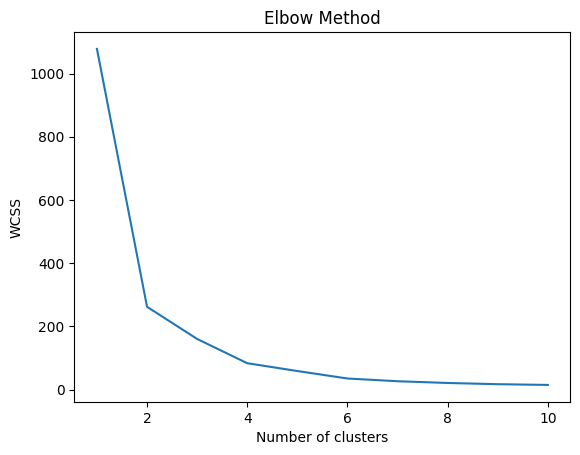

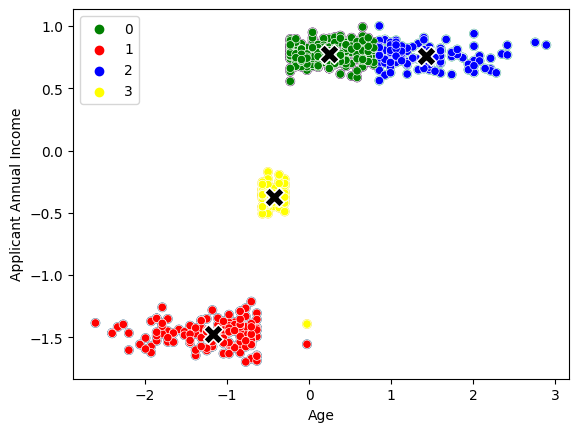

In [21]:
le = LabelEncoder()

# df_copy['Car Purchased Encoded'] = le.fit_transform(filtered_data_sw['Car Purchased'])

# select the columns for clustering
X = df_copy[['Age', 'Applicant_Annual_Income']]

# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# determine the number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# fit the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# add the cluster labels to the original dataframe
df_copy['K_Means_Cluster'] = kmeans.labels_

centroids = kmeans.cluster_centers_

# plot the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
# sns.scatterplot(x=df_copy['Age'], y=df_copy['Applicant_Annual_Income'], hue=kmeans.labels_, data=df_copy, palette=["green", "red", "blue", "yellow"])
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans.labels_, data=df_copy, palette=["green", "red", "blue", "yellow"])
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='black', marker='X', s=200)

# plt.xticks(df_copy['Age'])

plt.xlabel('Age')
plt.ylabel('Applicant Annual Income')
plt.show()

In [22]:
# import pandas as pd
# import numpy as np
# from sklearn.cluster import DBSCAN
# import matplotlib.pyplot as plt

X = df_copy[['Age', 'Applicant_Annual_Income']]

# Apply DBSCAN
dbscan = DBSCAN(eps=4, min_samples=5)
dbscan.fit(X)

n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print("Number of clusters created by DBSCAN:", n_clusters)

Number of clusters created by DBSCAN: 0


    Age  Applicant_Annual_Income
12   50                5629619.0
36   40                5647542.0
59   30                2605364.0
65   35                3936748.0
94   58                5461425.0


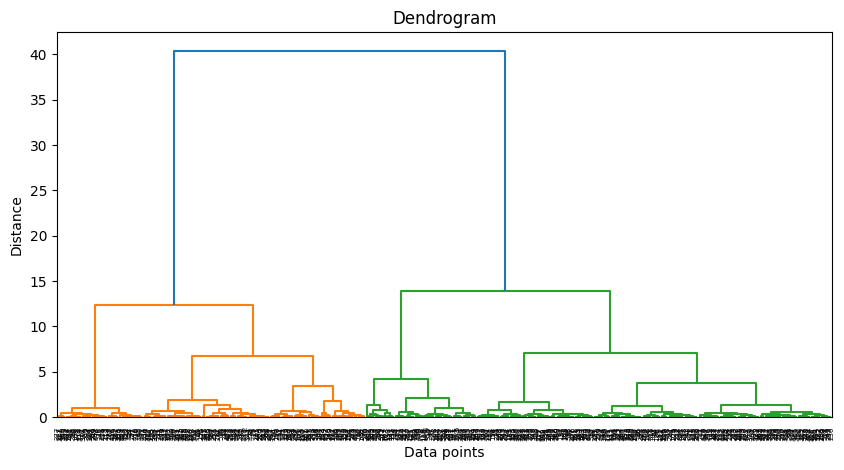

In [23]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import StandardScaler
# from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# import matplotlib.pyplot as plt

# subset the dataframe to include only the two columns of interest
X = df_copy[['Age', 'Applicant_Annual_Income']]

print(X.head())

# scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# compute the linkage matrix using the ward method
Z = linkage(X_scaled, method='ward')

# plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

# # set the cutoff value for number of clusters
cutoff = 3

# # determine the number of clusters using fcluster


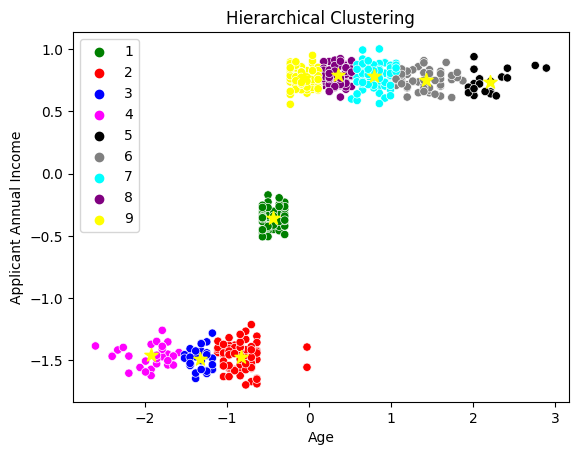

In [24]:
clusters = fcluster(Z, cutoff, criterion='distance')
df_copy['Hierarchical_Cluster'] = clusters

# calculate the mean of each cluster
means = []
for i in range(1, len(np.unique(clusters))+1):
    cluster_mean = np.mean(X_scaled[clusters==i], axis=0)
    means.append(cluster_mean)

sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, data=df_copy, palette=["green", "red", "blue", "magenta","black","grey","cyan","purple","yellow","brown"])
means = np.array(means)
plt.scatter(means[:, 0], means[:, 1], marker='*', color='yellow', s=100)
plt.xlabel('Age')
plt.ylabel('Applicant Annual Income')
plt.title('Hierarchical Clustering')
plt.show()


In [25]:
df_copy.head()

,Age,Married,Employment_Status,Applicant_Annual_Income,Co_Applicant_Annual_Income,Car Purchased,K_Means_Cluster,Hierarchical_Cluster
12,50,Yes,Software Engineer,5629619.0,2353882,Maruti Suzuki Swift,0,7
36,40,Yes,Software Engineer,5647542.0,2483780,Hyundai Verna,0,9
59,30,Yes,Software Engineer,2605364.0,2446433,Toyota Etios,1,2
65,35,Yes,Software Engineer,3936748.0,2489717,Maruti Suzuki Swift,3,1
94,58,No,Software Engineer,5461425.0,2601769,Toyota Etios,2,6


In [26]:
df.head()

,Loan_ID,Gender,Age,Married,No_Of_Dependents,Edu_Qualification,Employment_Status,Applicant_Annual_Income,Co_Applicant_Annual_Income,Applicant_Credit_History,Credit_Rating,Existing_No_of_Loans,Loan Approved,Loan_Amount_Availed,Car Purchased
1,66660,F,44,No,1.0,Not Graduate,Agriculturist,2458481.0,0,812,Excellent,1,Y,368772.21,Maruti Suzuki Desire
2,44493,M,44,Yes,1.0,Not Graduate,Not-Employed,602018.0,222551,711,Good,1,Y,60201.87,Hyundai i10
3,20408,F,67,Yes,1.0,Not Graduate,Not-Employed,572456.0,190633,571,Average,1,Y,5724.56,Hyundai i10
5,60791,M,39,Yes,2.0,Graduate,Not-Employed,432647.0,197570,558,Average,1,Y,43264.74,Maruti Suzuki Swift
7,90286,M,54,No,1.0,Graduate,Priv Sector,2040569.0,211030,679,Good,0,Y,204056.94,Toyota Etios


In [27]:
filtered_agri = df[(df['Employment_Status'] == 'Agriculturist')]

In [28]:
df_agri = filtered_agri.copy()
df_agri['Age'] = df['Age'].astype(int)
df_agri = df_agri.drop(['Loan_ID', 'Gender','No_Of_Dependents', 'Edu_Qualification', 'Applicant_Credit_History', 'Credit_Rating', 'Existing_No_of_Loans', 'Loan Approved', 'Loan_Amount_Availed'], axis=1)
le = LabelEncoder()
df_agri['Employment_Status_Encoded'] = df_agri['Employment_Status'].astype('category').cat.codes
df_agri['Car_Purchased_Encoded'] = df_agri['Car Purchased'].astype('category').cat.codes
df_agri.head()

,Age,Married,Employment_Status,Applicant_Annual_Income,Co_Applicant_Annual_Income,Car Purchased,Employment_Status_Encoded,Car_Purchased_Encoded
1,44,No,Agriculturist,2458481.0,0,Maruti Suzuki Desire,0,2
13,39,Yes,Agriculturist,1571025.0,0,Tata Indigo,0,6
18,21,Yes,Agriculturist,830077.0,0,Tata Sumo,0,7
23,36,Yes,Agriculturist,2116959.0,0,Maruti Suzuki Desire,0,2
34,52,No,Agriculturist,1245648.0,0,Hyundai i10,0,0


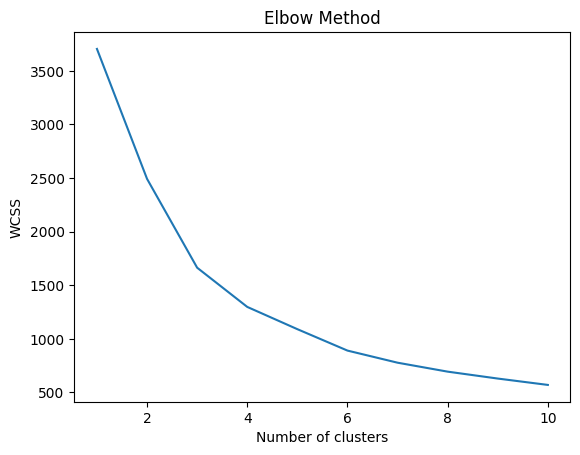

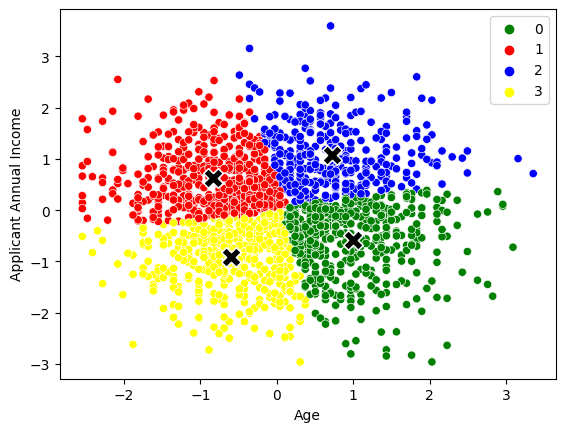

In [29]:
le_agri = LabelEncoder()

# df_copy['Car Purchased Encoded'] = le.fit_transform(filtered_data_sw['Car Purchased'])

# select the columns for clustering
X_agri = df_agri[['Age', 'Applicant_Annual_Income']]

# standardize the data
scaler = StandardScaler()
X_agri_scaled = scaler.fit_transform(X_agri)

# determine the number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_agri_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# fit the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(X_agri_scaled)

# add the cluster labels to the original dataframe
df_agri['K_Means_Cluster'] = kmeans.labels_

centroids = kmeans.cluster_centers_

# plot the clusters
# plt.scatter(X_agri_scaled[:, 0], X_agri_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
sns.scatterplot(x=X_agri_scaled[:, 0], y=X_agri_scaled[:, 1], hue=kmeans.labels_, data=df_agri, palette=["green", "red", "blue", "yellow"])
# sns.scatterplot(x=X_agri['Age'], y=X_agri['Applicant_Annual_Income'], hue=kmeans.labels_, data=df_agri, palette=["green", "red", "blue", "yellow"])
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='black', marker='X', s=200)

plt.xlabel('Age')
plt.ylabel('Applicant Annual Income')
plt.show()

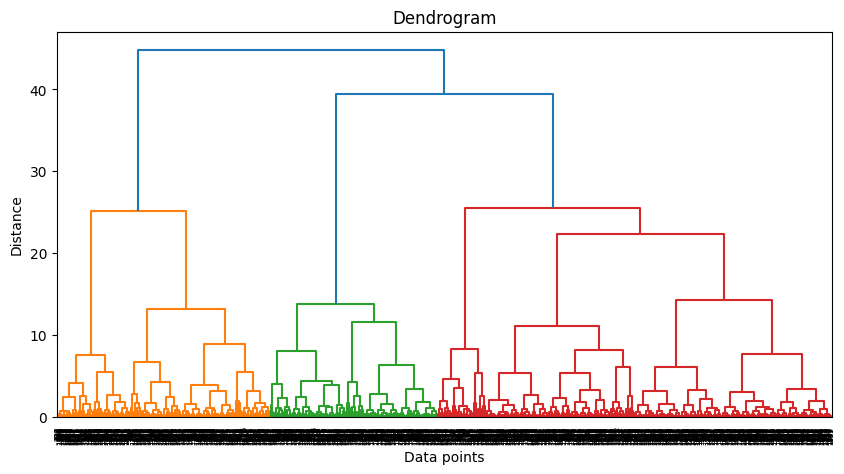

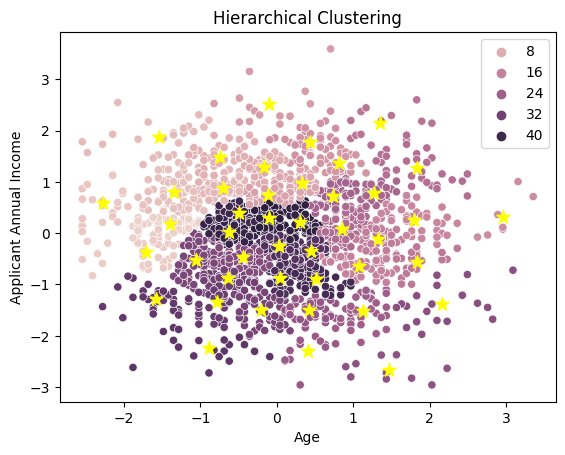

In [30]:
X = df_agri[['Age', 'Applicant_Annual_Income']]

# print(X.head())

# scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# compute the linkage matrix using the ward method
Z = linkage(X_scaled, method='ward')

# plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

# # set the cutoff value for number of clusters
cutoff = 3
clusters = fcluster(Z, cutoff, criterion='distance')
df_agri['Hierarchical_Cluster'] = clusters

# calculate the mean of each cluster
means = []
for i in range(1, len(np.unique(clusters))+1):
    cluster_mean = np.mean(X_scaled[clusters==i], axis=0)
    means.append(cluster_mean)

# sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, data=df_agri, palette=["green", "red", "blue", "magenta","black","grey","cyan","purple","yellow","brown"])
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, data=df_agri)
means = np.array(means)
plt.scatter(means[:, 0], means[:, 1], marker='*', color='yellow', s=100)
plt.xlabel('Age')
plt.ylabel('Applicant Annual Income')
plt.title('Hierarchical Clustering')
plt.show()


In [31]:
df.head()

,Loan_ID,Gender,Age,Married,No_Of_Dependents,Edu_Qualification,Employment_Status,Applicant_Annual_Income,Co_Applicant_Annual_Income,Applicant_Credit_History,Credit_Rating,Existing_No_of_Loans,Loan Approved,Loan_Amount_Availed,Car Purchased
1,66660,F,44,No,1.0,Not Graduate,Agriculturist,2458481.0,0,812,Excellent,1,Y,368772.21,Maruti Suzuki Desire
2,44493,M,44,Yes,1.0,Not Graduate,Not-Employed,602018.0,222551,711,Good,1,Y,60201.87,Hyundai i10
3,20408,F,67,Yes,1.0,Not Graduate,Not-Employed,572456.0,190633,571,Average,1,Y,5724.56,Hyundai i10
5,60791,M,39,Yes,2.0,Graduate,Not-Employed,432647.0,197570,558,Average,1,Y,43264.74,Maruti Suzuki Swift
7,90286,M,54,No,1.0,Graduate,Priv Sector,2040569.0,211030,679,Good,0,Y,204056.94,Toyota Etios


In [32]:
filtered_priv = df[(df['Employment_Status'] == 'Priv Sector')]

In [33]:
df_priv = filtered_priv.copy()
df_priv['Age'] = df['Age'].astype(int)
df_priv = df_priv.drop(['Loan_ID', 'Gender','No_Of_Dependents', 'Edu_Qualification', 'Applicant_Credit_History', 'Credit_Rating', 'Existing_No_of_Loans', 'Loan Approved', 'Loan_Amount_Availed'], axis=1)
df_priv['Employment_Status_Encoded'] = df_priv['Employment_Status'].astype('category').cat.codes
df_priv['Car_Purchased_Encoded'] = df_priv['Car Purchased'].astype('category').cat.codes
df_priv.head()

,Age,Married,Employment_Status,Applicant_Annual_Income,Co_Applicant_Annual_Income,Car Purchased,Employment_Status_Encoded,Car_Purchased_Encoded
7,54,No,Priv Sector,2040569.0,211030,Toyota Etios,0,10
21,16,Yes,Priv Sector,581149.0,196826,Hyundai i10,0,5
89,35,Yes,Priv Sector,1419801.0,211072,Tata Indigo,0,9
186,57,Yes,Priv Sector,1923041.0,193677,Maruti Suzuki Swift,0,8
297,28,No,Priv Sector,848185.0,179959,Hyundai i10,0,5


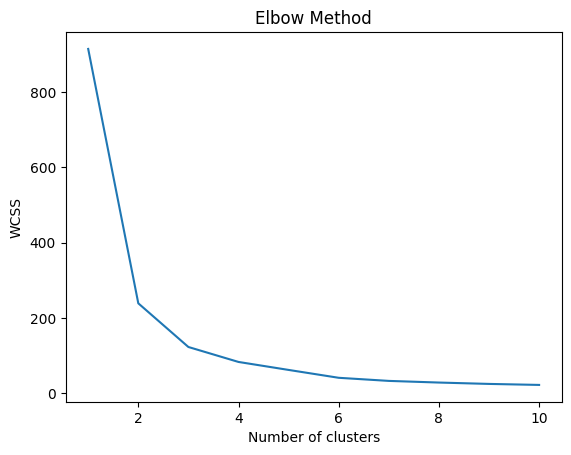

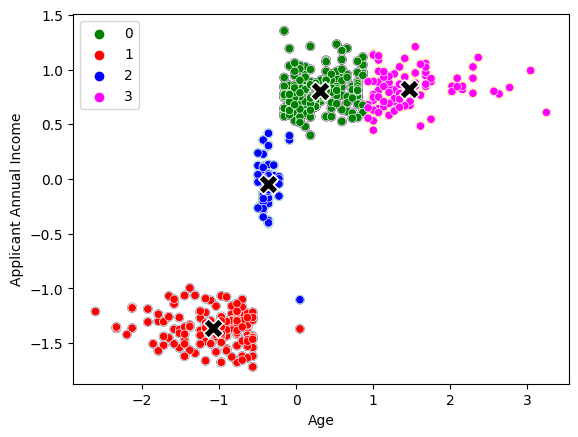

In [34]:
le = LabelEncoder()

# select the columns for clustering
X = df_priv[['Age', 'Applicant_Annual_Income']]

# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# determine the number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# fit the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# add the cluster labels to the original dataframe
df_priv['K_Means_Cluster'] = kmeans.labels_

centroids = kmeans.cluster_centers_

# plot the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans.labels_, data=df_priv, palette=["green", "red", "blue", "magenta"])
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='black', marker='X', s=200)

plt.xlabel('Age')
plt.ylabel('Applicant Annual Income')
plt.show()

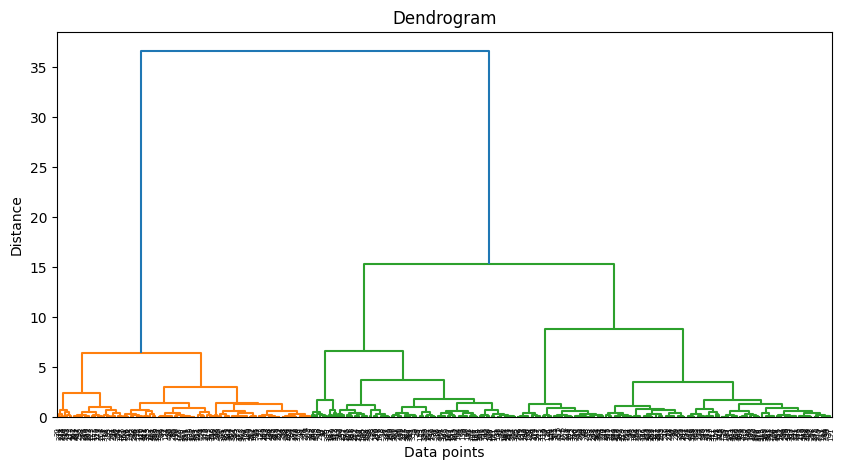

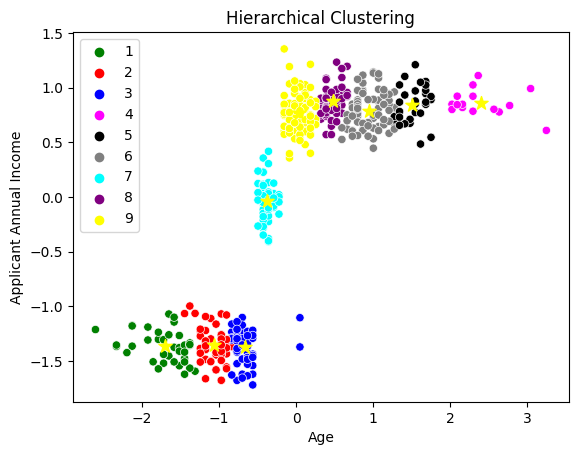

In [35]:
X = df_priv[['Age', 'Applicant_Annual_Income']]

# print(X.head())

# scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# compute the linkage matrix using the ward method
Z = linkage(X_scaled, method='ward')

# plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

# # set the cutoff value for number of clusters
cutoff = 3
clusters = fcluster(Z, cutoff, criterion='distance')
df_priv['Hierarchical_Cluster'] = clusters

# calculate the mean of each cluster
means = []
for i in range(1, len(np.unique(clusters))+1):
    cluster_mean = np.mean(X_scaled[clusters==i], axis=0)
    means.append(cluster_mean)

sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, data=df_priv, palette=["green", "red", "blue", "magenta","black","grey","cyan","purple","yellow","brown"])
# sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, data=df_priv)
means = np.array(means)
plt.scatter(means[:, 0], means[:, 1], marker='*', color='yellow', s=100)
plt.xlabel('Age')
plt.ylabel('Applicant Annual Income')
plt.title('Hierarchical Clustering')
plt.show()


In [36]:
df['Employment_Status'].unique()

array(['Agriculturist', 'Not-Employed', 'Priv Sector', 'Govt Sector',
       'Software Engineer', 'Self-Employed'], dtype=object)

In [37]:
filtered_govt = df[(df['Employment_Status'] == 'Govt Sector')]

In [38]:
df_govt = filtered_govt.copy()
df_govt['Age'] = df['Age'].astype(int)
df_govt = df_govt.drop(['Loan_ID', 'Gender','No_Of_Dependents', 'Edu_Qualification', 'Applicant_Credit_History', 'Credit_Rating', 'Existing_No_of_Loans', 'Loan Approved', 'Loan_Amount_Availed'], axis=1)
# df_govt['Employment_Status_Encoded'] = df_priv['Employment_Status'].astype('category').cat.codes
# df_govt['Car_Purchased_Encoded'] = df_govt['Car Purchased'].astype('category').cat.codes
df_govt.head()

,Age,Married,Employment_Status,Applicant_Annual_Income,Co_Applicant_Annual_Income,Car Purchased
8,30,Yes,Govt Sector,642929.0,124149,Hyundai Santro
11,29,Yes,Govt Sector,651066.0,82127,Maruti Suzuki Swift
16,23,Yes,Govt Sector,601724.0,76255,Maruti Suzuki Swift
71,24,Yes,Govt Sector,536270.0,65917,Datsun Go
80,35,Yes,Govt Sector,1070824.0,170958,Tata Indigo


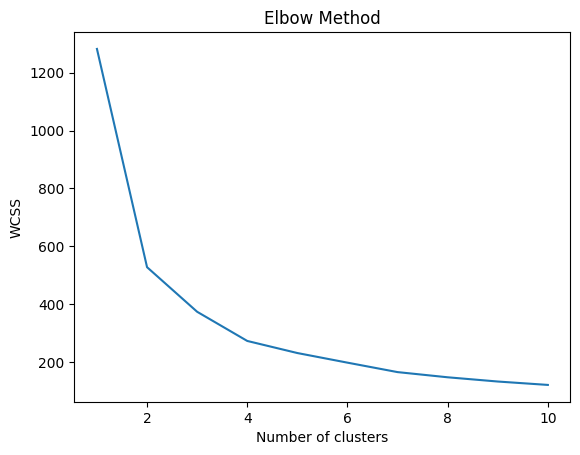

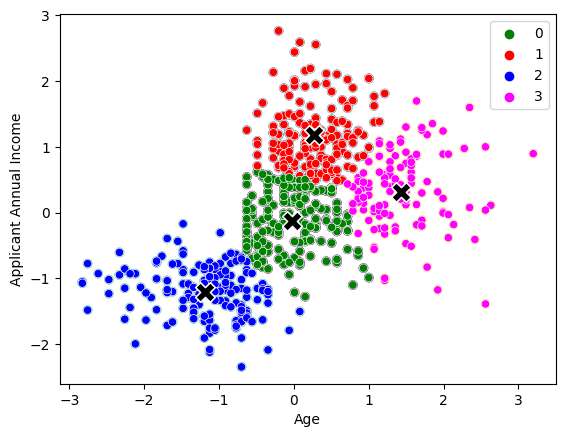

In [39]:
le = LabelEncoder()

# select the columns for clustering
X = df_govt[['Age', 'Applicant_Annual_Income']]

# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# determine the number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# fit the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# add the cluster labels to the original dataframe
df_govt['K_Means_Cluster'] = kmeans.labels_

centroids = kmeans.cluster_centers_

# plot the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans.labels_, data=df_govt, palette=["green", "red", "blue", "magenta"])
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='black', marker='X', s=200)

plt.xlabel('Age')
plt.ylabel('Applicant Annual Income')
plt.show()

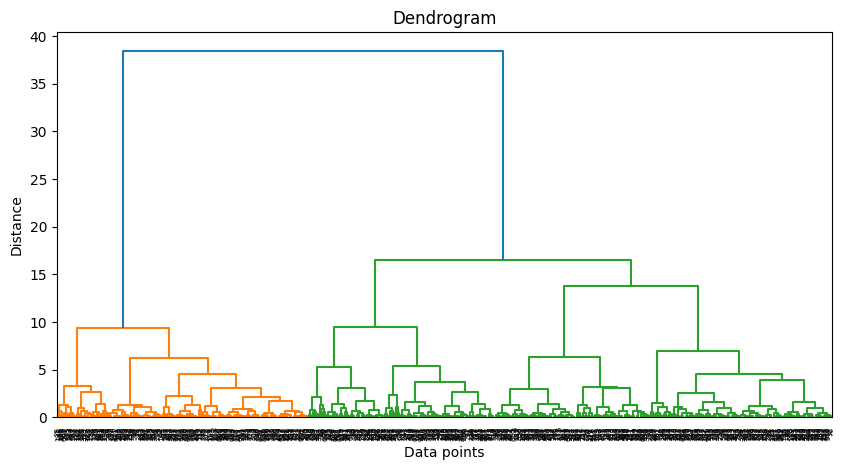

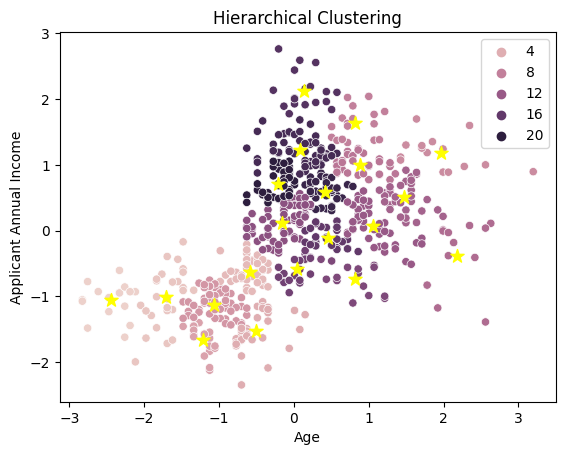

In [40]:
X = df_govt[['Age', 'Applicant_Annual_Income']]

# print(X.head())

# scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# compute the linkage matrix using the ward method
Z = linkage(X_scaled, method='ward')

# plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

# # set the cutoff value for number of clusters
cutoff = 3
clusters = fcluster(Z, cutoff, criterion='distance')
df_govt['Hierarchical_Cluster'] = clusters

# calculate the mean of each cluster
means = []
for i in range(1, len(np.unique(clusters))+1):
    cluster_mean = np.mean(X_scaled[clusters==i], axis=0)
    means.append(cluster_mean)

# sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, data=df_govt, palette=["green", "red", "blue", "magenta","black","grey","cyan","purple","yellow","brown"])
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, data=df_govt)
means = np.array(means)
plt.scatter(means[:, 0], means[:, 1], marker='*', color='yellow', s=100)
plt.xlabel('Age')
plt.ylabel('Applicant Annual Income')
plt.title('Hierarchical Clustering')
plt.show()


In [41]:
df["Employment_Status"].unique()

array(['Agriculturist', 'Not-Employed', 'Priv Sector', 'Govt Sector',
       'Software Engineer', 'Self-Employed'], dtype=object)

In [42]:
filtered_self = df[(df['Employment_Status'] == 'Self-Employed')]

In [43]:
df_self = filtered_self.copy()
df_self['Age'] = df['Age'].astype(int)
df_self = df_self.drop(['Loan_ID', 'Gender','No_Of_Dependents', 'Edu_Qualification', 'Applicant_Credit_History', 'Credit_Rating', 'Existing_No_of_Loans', 'Loan Approved', 'Loan_Amount_Availed'], axis=1)
df_self['Car_Purchased_Encoded'] = df_self['Car Purchased'].astype('category').cat.codes
df_self.head()

,Age,Married,Employment_Status,Applicant_Annual_Income,Co_Applicant_Annual_Income,Car Purchased,Car_Purchased_Encoded
25,45,No,Self-Employed,489325.0,659258,Tata Indigo,3
30,36,No,Self-Employed,817610.0,992942,Maruti Suzuki Desire,1
31,57,No,Self-Employed,1267114.0,1009675,Toyota Etios,4
32,55,Yes,Self-Employed,333459.0,957365,Hyundai i10,0
48,39,Yes,Self-Employed,537628.0,804849,Toyota Etios,4


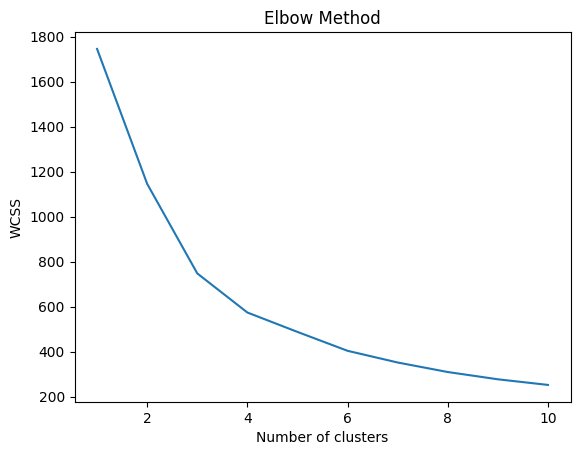

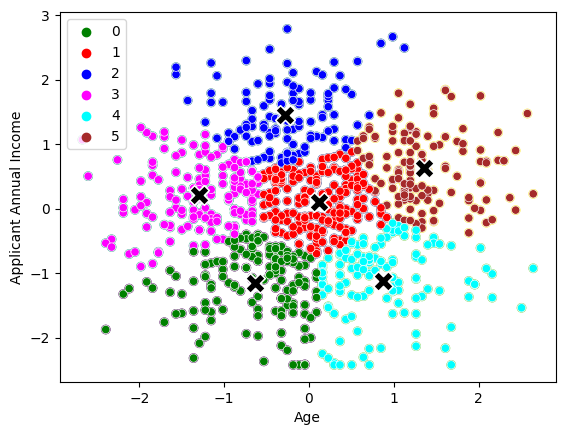

In [44]:
le = LabelEncoder()

# select the columns for clustering
X = df_self[['Age', 'Applicant_Annual_Income']]

# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# determine the number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# fit the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# add the cluster labels to the original dataframe
df_self['K_Means_Cluster'] = kmeans.labels_

centroids = kmeans.cluster_centers_

# plot the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans.labels_, data=df_self, palette=["green", "red", "blue", "magenta","cyan","brown"])
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='black', marker='X', s=200)

plt.xlabel('Age')
plt.ylabel('Applicant Annual Income')
plt.show()

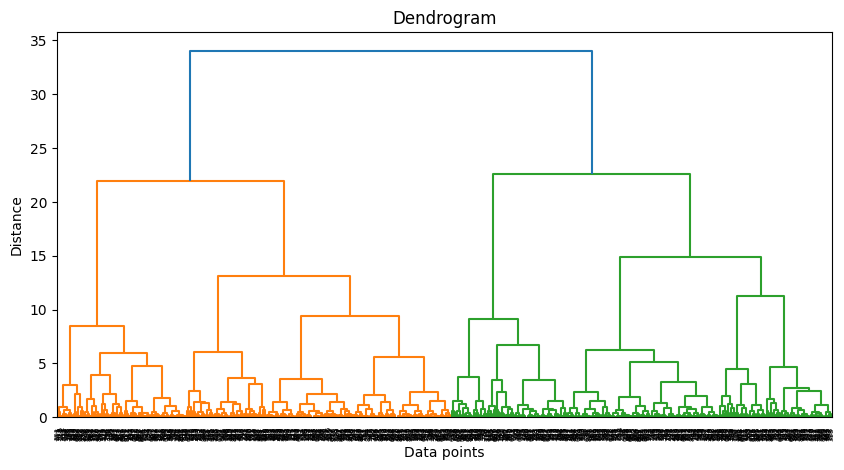

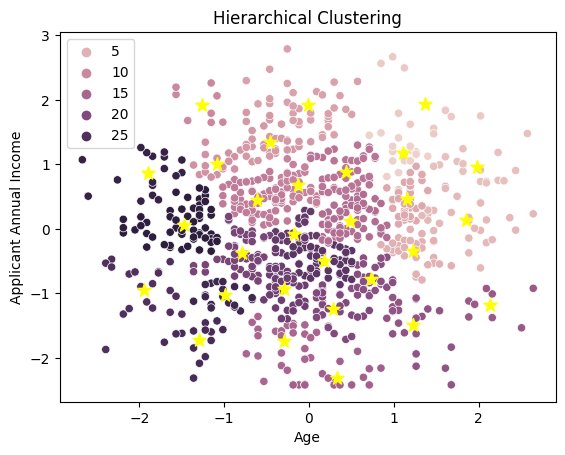

In [45]:
X = df_self[['Age', 'Applicant_Annual_Income']]

# print(X.head())

# scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# compute the linkage matrix using the ward method
Z = linkage(X_scaled, method='ward')

# plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

# # set the cutoff value for number of clusters
cutoff = 3
clusters = fcluster(Z, cutoff, criterion='distance')
df_self['Hierarchical_Cluster'] = clusters

# calculate the mean of each cluster
means = []
for i in range(1, len(np.unique(clusters))+1):
    cluster_mean = np.mean(X_scaled[clusters==i], axis=0)
    means.append(cluster_mean)

# sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, data=df_self, palette=["green", "red", "blue", "magenta","black","grey","cyan","purple","yellow","brown"])
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, data=df_self)
means = np.array(means)
plt.scatter(means[:, 0], means[:, 1], marker='*', color='yellow', s=100)
plt.xlabel('Age')
plt.ylabel('Applicant Annual Income')
plt.title('Hierarchical Clustering')
plt.show()


In [46]:
df['Employment_Status'].unique()

array(['Agriculturist', 'Not-Employed', 'Priv Sector', 'Govt Sector',
       'Software Engineer', 'Self-Employed'], dtype=object)

In [47]:
filtered_not = df[(df['Employment_Status'] == 'Not-Employed')]

In [48]:
df_not = filtered_not.copy()
df_not['Age'] = df['Age'].astype(int)
df_not = df_not.drop(['Loan_ID', 'Gender','No_Of_Dependents', 'Edu_Qualification', 'Applicant_Credit_History', 'Credit_Rating', 'Existing_No_of_Loans', 'Loan Approved', 'Loan_Amount_Availed'], axis=1)
df_not['Car_Purchased_Encoded'] = df_not['Car Purchased'].astype('category').cat.codes
df_not.head()

,Age,Married,Employment_Status,Applicant_Annual_Income,Co_Applicant_Annual_Income,Car Purchased,Car_Purchased_Encoded
2,44,Yes,Not-Employed,602018.0,222551,Hyundai i10,0
3,67,Yes,Not-Employed,572456.0,190633,Hyundai i10,0
5,39,Yes,Not-Employed,432647.0,197570,Maruti Suzuki Swift,2
20,23,No,Not-Employed,555070.0,192567,Maruti Suzuki Swift,2
26,32,Yes,Not-Employed,481421.0,199131,Tata Indigo,3


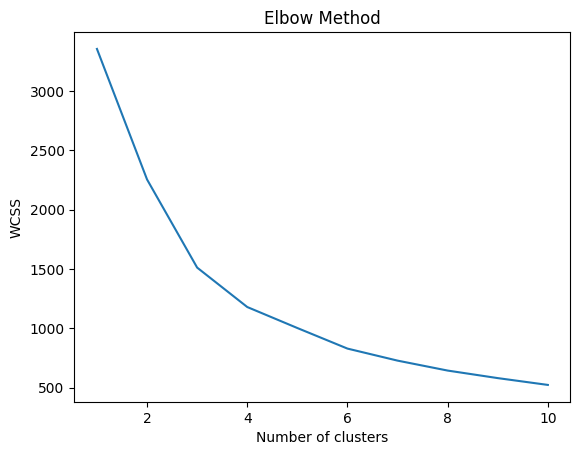

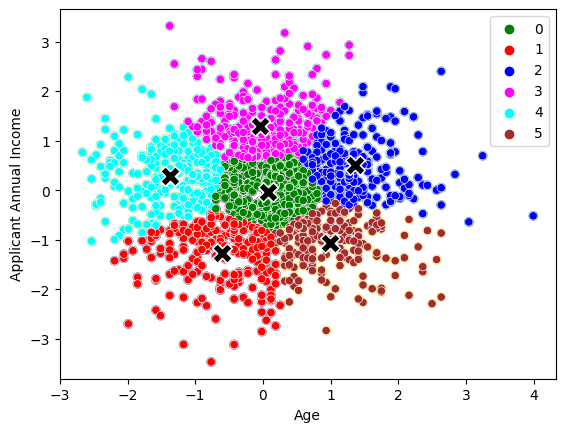

In [49]:
le = LabelEncoder()

# select the columns for clustering
X = df_not[['Age', 'Applicant_Annual_Income']]

# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# determine the number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# fit the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# add the cluster labels to the original dataframe
df_not['K_Means_Cluster'] = kmeans.labels_

centroids = kmeans.cluster_centers_

# plot the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans.labels_, data=df_not, palette=["green", "red", "blue", "magenta","cyan","brown"])
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='black', marker='X', s=200)

plt.xlabel('Age')
plt.ylabel('Applicant Annual Income')
plt.show()

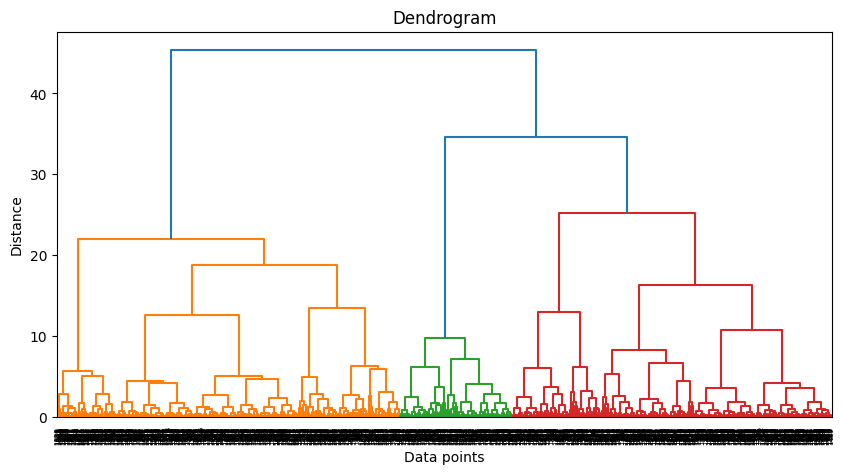

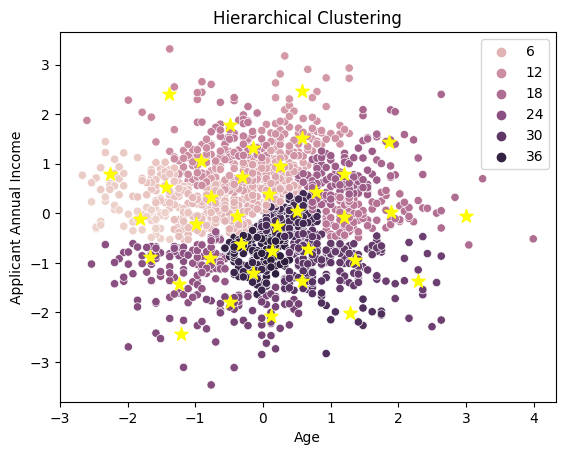

In [50]:
X = df_not[['Age', 'Applicant_Annual_Income']]

# scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# compute the linkage matrix using the ward method
Z = linkage(X_scaled, method='ward')

# plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

# # set the cutoff value for number of clusters
cutoff = 3
clusters = fcluster(Z, cutoff, criterion='distance')
df_not['Hierarchical_Cluster'] = clusters

# calculate the mean of each cluster
means = []
for i in range(1, len(np.unique(clusters))+1):
    cluster_mean = np.mean(X_scaled[clusters==i], axis=0)
    means.append(cluster_mean)

# sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, data=df_not, palette=["green", "red", "blue", "magenta","black","grey","cyan","purple","yellow","brown"])
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, data=df_not)
means = np.array(means)
plt.scatter(means[:, 0], means[:, 1], marker='*', color='yellow', s=100)
plt.xlabel('Age')
plt.ylabel('Applicant Annual Income')
plt.title('Hierarchical Clustering')
plt.show()


In [51]:
df_not.columns

Index(['Age', 'Married', 'Employment_Status', 'Applicant_Annual_Income',
       'Co_Applicant_Annual_Income', 'Car Purchased', 'Car_Purchased_Encoded',
       'K_Means_Cluster', 'Hierarchical_Cluster'],
      dtype='object')

In [52]:
df['Employment_Status'].unique()

array(['Agriculturist', 'Not-Employed', 'Priv Sector', 'Govt Sector',
       'Software Engineer', 'Self-Employed'], dtype=object)

In [53]:
df.head()

,Loan_ID,Gender,Age,Married,No_Of_Dependents,Edu_Qualification,Employment_Status,Applicant_Annual_Income,Co_Applicant_Annual_Income,Applicant_Credit_History,Credit_Rating,Existing_No_of_Loans,Loan Approved,Loan_Amount_Availed,Car Purchased
1,66660,F,44,No,1.0,Not Graduate,Agriculturist,2458481.0,0,812,Excellent,1,Y,368772.21,Maruti Suzuki Desire
2,44493,M,44,Yes,1.0,Not Graduate,Not-Employed,602018.0,222551,711,Good,1,Y,60201.87,Hyundai i10
3,20408,F,67,Yes,1.0,Not Graduate,Not-Employed,572456.0,190633,571,Average,1,Y,5724.56,Hyundai i10
5,60791,M,39,Yes,2.0,Graduate,Not-Employed,432647.0,197570,558,Average,1,Y,43264.74,Maruti Suzuki Swift
7,90286,M,54,No,1.0,Graduate,Priv Sector,2040569.0,211030,679,Good,0,Y,204056.94,Toyota Etios


In [54]:


new_user_df = pd.DataFrame({'Loan_ID': [1044], 'Gender': ["M"], 'Age': [42],
                            'Married': ["Yes"], 'No_Of_Dependents': [4], 'Edu_Qualification': ['Graduate'],
                            'Employment_Status': "Software Engineer", 'Applicant_Annual_Income': [4500000],
                            'Co_Applicant_Annual_Income': [3000000], 'Applicant_Credit_History': 786,
                            'Credit_Rating': ['Excellent'], 'Existing_No_of_Loans': [0], 'Loan_Amount_Availed': [0]
 })

In [55]:
new_user_df.head(1)

,Loan_ID,Gender,Age,Married,No_Of_Dependents,Edu_Qualification,Employment_Status,Applicant_Annual_Income,Co_Applicant_Annual_Income,Applicant_Credit_History,Credit_Rating,Existing_No_of_Loans,Loan_Amount_Availed
0,1044,M,42,Yes,4,Graduate,Software Engineer,4500000,3000000,786,Excellent,0,0


In [56]:
if new_user_df['Employment_Status'].iloc[0] == "Software Engineer":
    print("User is a s/w engineer")
else:
    print("not a s/w engineer")

User is a s/w engineer


In [57]:
df_sw = df[(df['Employment_Status'] == 'Software Engineer')]

In [58]:
df_hc = df_sw.copy()
df_hc['Age'] = df['Age'].astype(int)
df_hc = df_hc.drop(['Loan_ID', 'Gender','No_Of_Dependents', 'Edu_Qualification', 'Applicant_Credit_History', 'Credit_Rating', 'Existing_No_of_Loans', 'Loan Approved', 'Loan_Amount_Availed'], axis=1)
# df_hc['Car_Purchased_Encoded'] = df_hc['Car Purchased'].astype('category').cat.codes
df_hc.head()

,Age,Married,Employment_Status,Applicant_Annual_Income,Co_Applicant_Annual_Income,Car Purchased
12,50,Yes,Software Engineer,5629619.0,2353882,Maruti Suzuki Swift
36,40,Yes,Software Engineer,5647542.0,2483780,Hyundai Verna
59,30,Yes,Software Engineer,2605364.0,2446433,Toyota Etios
65,35,Yes,Software Engineer,3936748.0,2489717,Maruti Suzuki Swift
94,58,No,Software Engineer,5461425.0,2601769,Toyota Etios


    Age  Applicant_Annual_Income
12   50                5629619.0
36   40                5647542.0
59   30                2605364.0
65   35                3936748.0
94   58                5461425.0


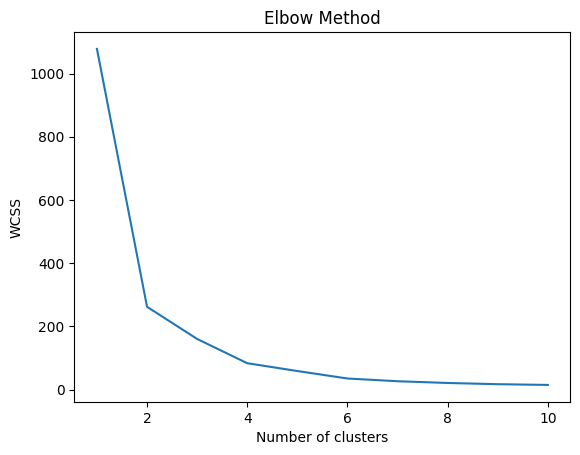

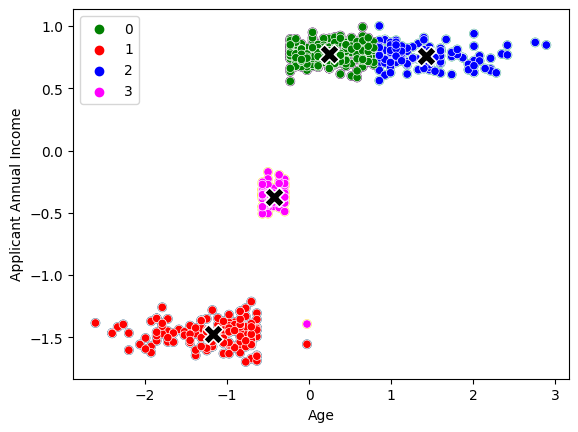

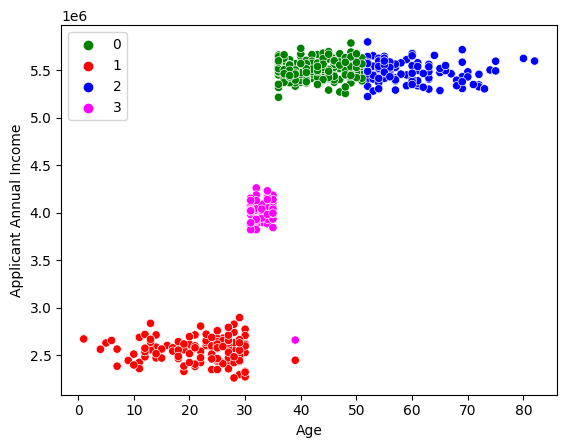

In [59]:
le = LabelEncoder()

# select the columns for clustering
X = df_hc[['Age', 'Applicant_Annual_Income']]
# X = df_hc.iloc[:, [0,3]].values
print(X[:5])

# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# determine the number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    # kmeans = KMeans(n_clusters=i, init='random', random_state=42)
    kmeans.fit(X_scaled)
    # kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(X_scaled)
df_hc['K_Means_Cluster'] = kmeans.labels_

centroids = kmeans.cluster_centers_

# plot the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans.labels_, data=df_hc, palette=["green", "red", "blue", "magenta","cyan","brown"])
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='black', marker='X', s=200)

plt.xlabel('Age')
plt.ylabel('Applicant Annual Income')
plt.show()

sns.scatterplot(x=X['Age'], y=X['Applicant_Annual_Income'], hue=kmeans.labels_, data=df_hc, palette=["green", "red", "blue", "magenta","cyan","brown"])
plt.xlabel('Age')
plt.ylabel('Applicant Annual Income')
plt.show()

In [60]:
X.head()

,Age,Applicant_Annual_Income
12,50,5629619.0
36,40,5647542.0
59,30,2605364.0
65,35,3936748.0
94,58,5461425.0


In [61]:
new_data = [35, 4550000]

new_data_df = pd.DataFrame([new_data], columns=['Age', 'Applicant_Annual_Income'])
print(new_data_df.head())
newdf_scaled = scaler.transform(new_data_df)
cluster_label = kmeans.predict(newdf_scaled)
print("The new data point belongs to cluster:", cluster_label[0])

   Age  Applicant_Annual_Income
0   35                  4550000
The new data point belongs to cluster: 3


In [62]:
df_grouped = df_hc.groupby('K_Means_Cluster')
# Define a function to return the top three values of a column

def get_top_three(column):
    return column.value_counts().nlargest(3).index.tolist()

def get_top_three_cars(cluster_no):
    cluster_number = cluster_no
    top_three_values = get_top_three(df_grouped.get_group(cluster_number)['Car Purchased'])
    return top_three_values

print(f"Recommended Top 3 Cars for cluster {cluster_label[0]} is {get_top_three_cars(cluster_label[0])}")


Recommended Top 3 Cars for cluster 3 is ['Toyota Etios', 'Maruti Suzuki Desire', 'Maruti Suzuki Swift']
